# SURUTHI S
# 225229141
# PDL LAB 14
# Classification of CIFAR-10 data with Data Augmentation

In [ ]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt


In [ ]:
(xtrain, ytrain) , (xtest, ytest) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
xtrain.shape, xtest.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
ytrain.shape, ytest.shape

((50000, 1), (10000, 1))

In [ ]:
num_classes = 10

In [ ]:
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

In [ ]:
xtrain = xtrain.astype("float32")
xtest = xtest.astype("float32")

In [ ]:
xtrain /= 255.0
xtest /= 255.0

In [ ]:
model = Sequential ()
## 5x5 convolution with 2x2 stride and 32 filters
model. add (Conv2D (32, (5, 5), strides = (2,2),
                    padding='same',
                    input_shape=xtrain.shape[1:]))
model.add(Activation ('relu'))


## Another 5x5 convolution with 2x2 stride and 32 filters

model.add(Conv2D (32, (5, 5), strides = (2,2)))
model.add (Activation ('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout (0.25))


## Flatten turns 3x3x32 into 28x1

model.add(Flatten())
model.add(Dense (512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

In [ ]:
batch_size = 32

# initiate RMSprop optimizer
from keras import optimizers
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop

model.compile(loss='categorical_crossentropy',optimizer=opt,
               metrics=['accuracy'])

In [ ]:
history_vanilla_cnn = model.fit(xtrain,ytrain,epochs=15,validation_data= (xtest, ytest))

Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4131 - accuracy: 0.4928 - val_loss: 1.2618 - val_accuracy: 0.5521
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3245 - accuracy: 0.5275 - val_loss: 1.2064 - val_accuracy: 0.5665
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2648 - accuracy: 0.5518 - val_loss: 1.2616 - val_accuracy: 0.5556
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2192 - accuracy: 0.5668 - val_loss: 1.1250 - val_accuracy: 0.6059
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1874 - accuracy: 0.5814 - val_loss: 1.1026 - val_accuracy: 0.6108
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1596 - accuracy: 0.5914 - val_loss: 1.0752 - val_accuracy: 0.6247
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1433 - accuracy: 0.5991 - val_loss: 1.2129 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt
def accuracy(model):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title(f"{model}  Accuracy ")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


def loss_plot(model):
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title(f"{model} Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


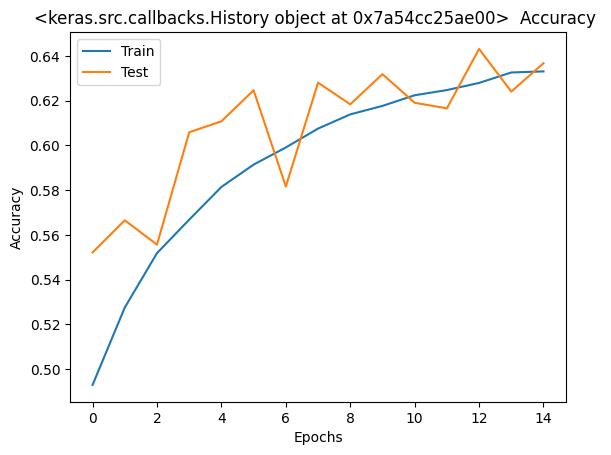

In [ ]:
accuracy(history_vanilla_cnn)

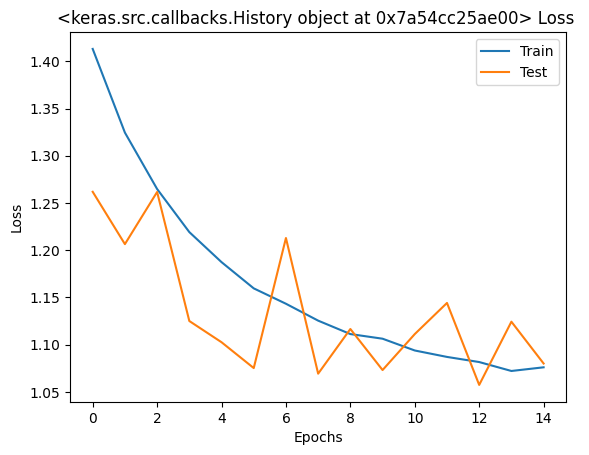

In [ ]:
loss_plot(history_vanilla_cnn)

In [ ]:
datagen_aug = ImageDataGenerator (featurewise_center=False, #set input mean to 0 over
                              samplewise_center=False, # set each sample mean to 0,
                              featurewise_std_normalization=False, # divide inputs std of the dataset
                              samplewise_std_normalization=False, # divide each input by its std
                              zca_whitening=False, # apply ZCA whitening
                              rotation_range=0, #randomly rotate images in the range (degrees, 0 to 180).
                              width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
                              height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                              horizontal_flip=True, # randomly flip images
                              vertical_flip = False) # randomly flip images

In [ ]:
datagen_aug.fit(xtrain) # computes any statistics that may be needed (e.g. for centering) from the training set.

In [ ]:
# Fit the model on the batches generated by datagen. flow().

data_aug_cnn = model.fit_generator(datagen_aug.flow(xtrain, ytrain, batch_size=batch_size),
                    steps_per_epoch=xtrain.shape[0],
                    epochs=15,
                    validation_data= (xtest, ytest))

Epoch 1/15
    4/50000 [..............................] - ETA: 15:05 - loss: 1.3854 - accuracy: 0.4766

<ipython-input-28-df69d47e6612>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  data_aug_cnn = model.fit_generator(datagen_aug.flow(xtrain, ytrain, batch_size=batch_size),


 1561/50000 [..............................] - ETA: 23:16 - loss: 1.2841 - accuracy: 0.5621

50000/50000 [==============================] - 46s 923us/step - loss: 1.2844 - accuracy: 0.5622 - val_loss: 1.0510 - val_accuracy: 0.6477


 accuracy: 0.5622 - val_loss: 1.0510 - val_accuracy: 0.6477

# Advanced Architecture

In [ ]:
model_advanced = Sequential ()
## 5x5 convolution with 2x2 stride and 32 filters
model_advanced.add (Conv2D (32, (5, 5), strides = (2,2),
                    padding='same',
                    input_shape=xtrain.shape[1:],
                    activation = 'relu'))

model_advanced.add (Conv2D (32, (5, 5), strides = (2,2),
                    padding='same',
                    activation = 'relu'))

model_advanced.add(MaxPooling2D(pool_size=(2, 2)))


model_advanced.add (Conv2D (32, (3, 3), strides = (2,2),
                    padding='same',
                    input_shape=xtrain.shape[1:],
                    activation = 'relu'))

model_advanced.add (Conv2D (32, (3, 3), strides = (2,2),
                    padding='same',
                    activation = 'relu'))


model_advanced.add(Flatten())

model_advanced.add(Dense (512, activation = 'relu'))

model_advanced.add(Dense (256, activation = 'relu'))

model_advanced.add(Dense(num_classes, activation = 'softmax'))


In [ ]:
model_advanced.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 2, 2, 32)          9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 32)          9248      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                      

In [ ]:
model_advanced.compile(loss='categorical_crossentropy',optimizer='adam',
               metrics=['accuracy'])

In [ ]:
history_adv_cnn = model_advanced.fit(xtrain,ytrain,epochs=15,validation_data= (xtest, ytest))

Epoch 1/15
1563/1563 [==============================] - 20s 11ms/step - loss: 1.6446 - accuracy: 0.3926 - val_loss: 1.3880 - val_accuracy: 0.4971
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3292 - accuracy: 0.5183 - val_loss: 1.2843 - val_accuracy: 0.5329
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2106 - accuracy: 0.5629 - val_loss: 1.1909 - val_accuracy: 0.5725
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1267 - accuracy: 0.5957 - val_loss: 1.1444 - val_accuracy: 0.5906
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0601 - accuracy: 0.6235 - val_loss: 1.1360 - val_accuracy: 0.5972
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0121 - accuracy: 0.6400 - val_loss: 1.1592 - val_accuracy: 0.5896
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9693 - accuracy: 0.6555 - val_loss: 1.0765 - val_a

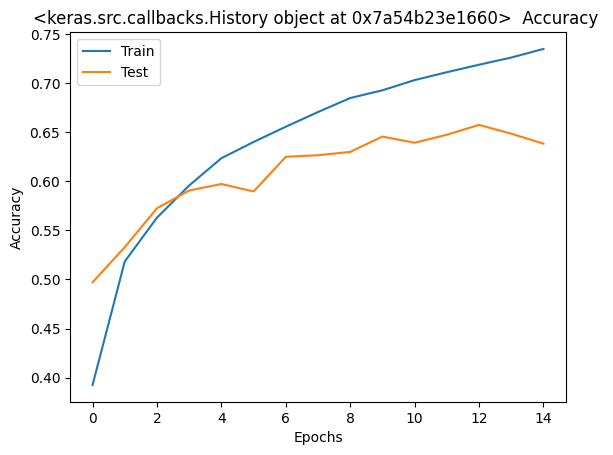

In [ ]:
accuracy(history_adv_cnn)

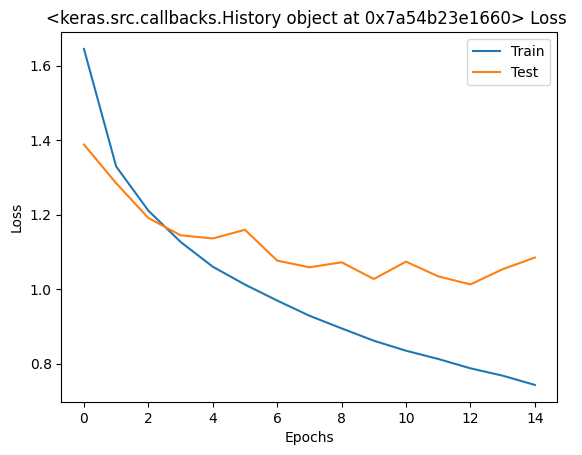

In [ ]:
loss_plot(history_adv_cnn)

In [ ]:
datagen_aug.fit(xtrain) # computes any statistics that may be needed (e.g. for centering) from the training set.

In [ ]:
# Fit the model on the batches generated by datagen. flow().

data_aug_cnn = model_advanced.fit_generator(datagen_aug.flow(xtrain, ytrain, batch_size=batch_size),
                    steps_per_epoch=xtrain.shape[0],
                    epochs=15,
                    validation_data= (xtest, ytest))

Epoch 1/15


<ipython-input-40-b258cbad5a90>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  data_aug_cnn = model_advanced.fit_generator(datagen_aug.flow(xtrain, ytrain, batch_size=batch_size),


 1561/50000 [..............................] - ETA: 23:07 - loss: 1.0644 - accuracy: 0.6264

50000/50000 [==============================] - 47s 927us/step - loss: 1.0645 - accuracy: 0.6264 - val_loss: 1.0293 - val_accuracy: 0.6436


 accuracy: 0.6264 - val_loss: 1.0293 - val_accuracy: 0.6436

Data Augmentation doesnot seems to fit well